In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.signal import convolve
from scipy import stats
from sympy import symbols, solve, Eq, Function
from sympy.matrices import Matrix
import sympy as sp
from TCSPC import *

In [2]:
NADH = Simulation([0.75,0.25],[0.4,4]) #create NADH instance of simulation class

### DEMO

#### Brief Introduction to Simulation class object:

Input: <ul>
       <li>amp - an array of amplitudes/fractional intensity of mono-exponential components</li>
       <li>tau - an array of lifetimes of mono-exponential components</li>
       <li>IRF characteristics e.g. offset, irfwidth, bg, run_time can be modified,
       but have default values as in the given script</li>
       <li>Histogram properties, e.g. window - x-axis range, n_bins - number of bins</li>
       </ul>
Methods: 

* `multi_exp_data` generate 1 multi exponential curve (1d array of size n_bins)\
* `MC_exp` : generate an array of mono exponential decay curves or 1 multi exponential curve using Monte Carlo method (i.e. random number generator, drawing from normal (IRF) and exponential distribution (decay))
* `plot`   : Plot the generated data. Need to pass a matplotlib `ax` object for plotting.\
Select data simulation function by setting MC =True (`MC_exp`) or False (`multi_exp_data`)

Call the `MC_exp()` method first to get data stored in `self.y`\
`multi_exp_data` would be stored in `self.y2`


In [44]:
w, p = NADH.phasor_fft(multi = False)
w = w[:int(len(w)/2)]


### Effect of trimming  In FFT

The data is trimmed to $8 \tau$ as beyond that bg > emitted photon

Note that FFT of trimmed data is almost the same as FFT of original data, and even contain less data points
Both FFT curves deviates from the analytic solution of the Fourier Transform, which may be an artifect of using Discrete transform with not enough data points. Also this may be a result of noise in the data.

In [94]:
tau0 = NADH.tau[0]
end = int(tau0*8*NADH.n_bins/NADH.window)
y_trim = NADH.y_arr[0,:end]
ker_trim = NADH.ker[:end]
p2 = np.fft.fft(y_trim)/np.sum(y_trim)/np.fft.fft(ker_trim)*np.sum(ker_trim)
w2 = 2*np.pi*np.fft.fftfreq(len(ker_trim),NADH.t[end]/len(ker_trim))
p2 = p2[:int(len(w2)/2)] #just get +ve freq
w2  = w2[:int(len(w2)/2)]


In [95]:
def exp_FT(omega,tau):
    '''Analytic solution to Fourier Transform of exponential decay with lifetime tau'''
    W, Tau = np.meshgrid(omega,tau)
    return 1/((W)**2+(1/Tau)**2) + 1j*W/Tau/((W)**2+(1/Tau)**2)

Text(0, 0.5, 'Imaginary component of FFT')

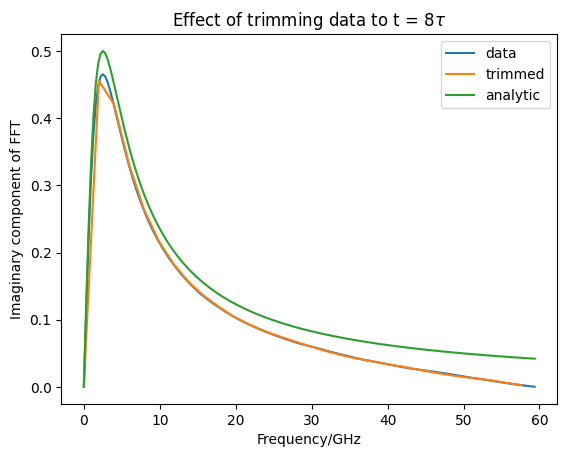

In [97]:
plt.title(r'Effect of trimming data to t = 8$\tau$')
for i in range(1):
    plt.plot(w,-np.imag(p[i,:len(w)]),label = 'data')
    plt.plot(w2,-np.imag(p2),label = 'trimmed')
    plt.plot(w, np.imag(exp_FT(w,NADH.tau)[i]),label = 'analytic')
plt.legend()
plt.xlabel('Frequency/GHz')
plt.ylabel('Imaginary component of FFT')

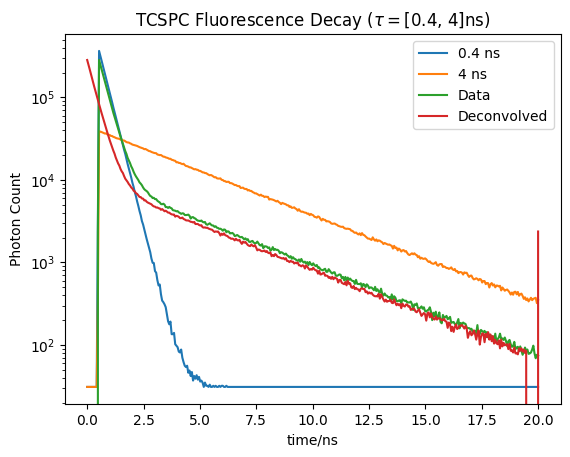

In [49]:
t, y_NADH = NADH.MC_exp()
fig,ax = plt.subplots(1,1)
NADH.plot(ax) #plot mono exp component
NADH.plot(ax,multi=True) #plot multi exp 
NADH.plot(ax,multi=True,deconv=True) #plot data deconvolved with IRF
handles, labels = ax.get_legend_handles_labels()
labels[-1] = 'Deconvolved'
ax.legend(labels)

In [7]:
handles, labels = ax.get_legend_handles_labels()
labels

['0.4 ns', '4 ns', 'Data', 'Data']